## Receipt Classification 
Importing all required Packages

In [1]:

# Preprocessing


from selenium import webdriver
from IPython.display import Image
#import cv2
from PIL import Image
import os
import time
import numpy as np
import urllib.request
#from xvfbwrapper import Xvfb
import urllib
from IPython import display
import pytesseract


#  Modelling
import numpy as np
np.random.seed(531)
from keras.layers import Input,Dense,Dropout,Conv1D,Conv2D,Activation,LSTM,MaxPooling2D
from keras.models import Model,model_from_json
import keras
import h5py
from IPython.core.debugger import set_trace
import tensorflow as tf


def as_keras_metric(method):
    import functools
    from keras import backend as K
    import tensorflow as tf
    @functools.wraps(method)
    def wrapper(self, args, **kwargs):
        """ Wrapper for turning tensorflow metrics into keras metrics """
        value, update_op = method(self, args, **kwargs)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([update_op]):
            value = tf.identity(value)
        return value
    return wrapper

@as_keras_metric
def auc_pr(y_true, y_pred, curve='PR'):
    return tf.metrics.auc(y_true, y_pred, curve=curve)


import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


##  Step -- 1
### Collecting Receipt  and Different text images  for both x and y parameters

I have found around 2 websites providing the Images data of Receipts, <br>

</t> http://expressexpense.com/view-receipts.php?page=51

I have used <b> Selenium </b> and image downloader extension to download the <b>Receipt images</b> of WebPage images

In [ ]:
# Script to Download the images of WebPage

# display = Xvfb()
# display.start()
driver=webdriver.Firefox()
driver.get("http://expressexpense.com/view-receipts.php?page=51")

images = driver.find_elements_by_tag_name('img')
for image in images:
    src = image.get_attribute("src")
    img = str(src).split('/')[-1].split('.')[0]
    if src:
        urllib.request.urlretrieve(src,'pictures/'+img+'.jpg')

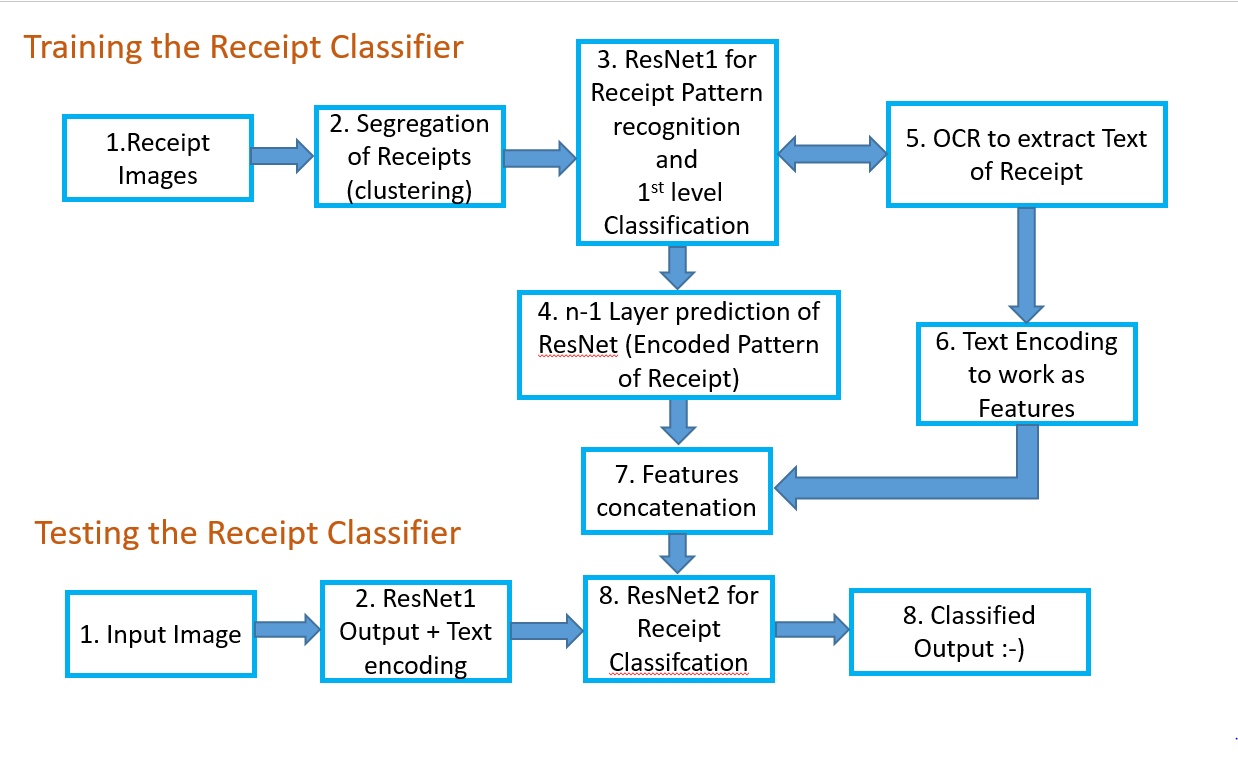

In [123]:
# Algorithm in Classifying the Receipt
display.Image(filename='Model.png')

## Classifying the Receipt with considering the Features of
## 1) Receipt Pattern and 
## 2) Text Content





## Step -- 2
###  Segregating the Receipt Images w.r.t  Type of Receipt

<b>There are different Types of Receipts</b> <br>
<br>
   Deep learning or any Neural Network cant learn patterns of different Receipts with the same Category <br>

    So Segregating or Clustering of images is required.
    Each Image Cluster follow specific pattern, So Neural Network should be able to learn the pattern.

    
#### OpenCV in Segregating the Images
here i have used OpenCV library in segregating the images<br>

        With respect to the number of formed Contours and the style of contours Receipts segregated into 3 Clusters
    
    
    
### Receipt Type - 1

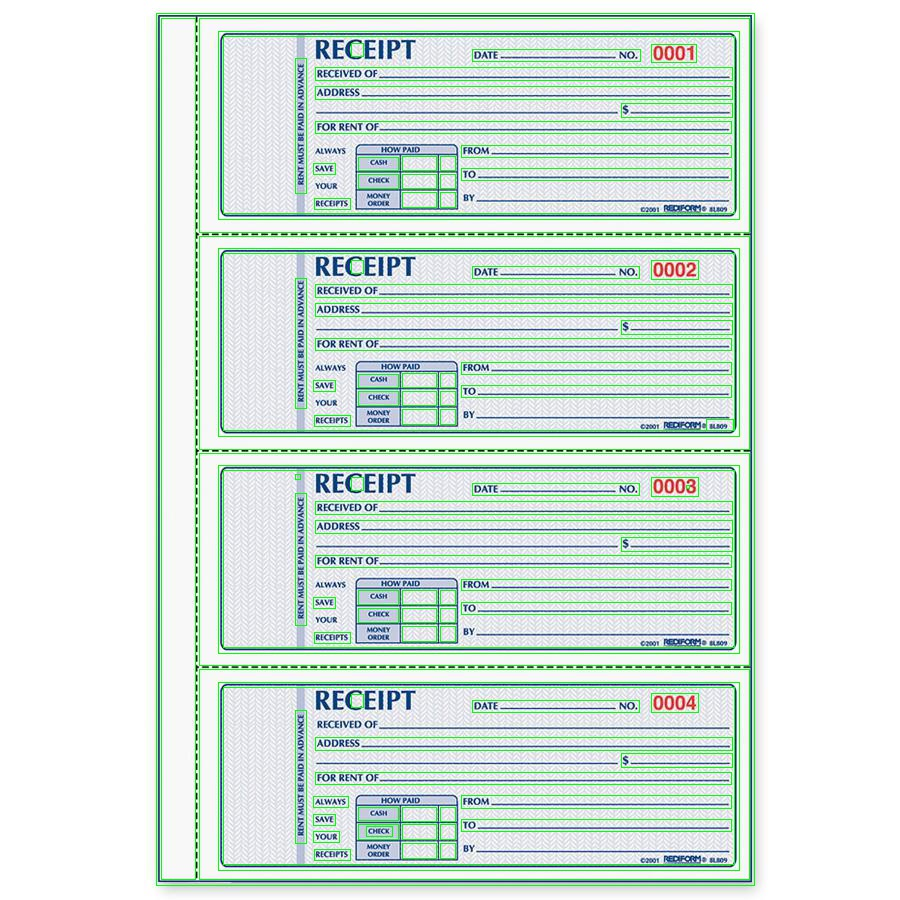

In [16]:
file = r'/home/naga/Documents/Naga/project/Reciept_classify/pictures/Reciept/1013029206.jpg'

im1 = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
im = cv2.imread(file)

ret,thresh1 = cv2.threshold(im1,180,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
dilated = cv2.dilate(thresh1,kernel,iterations = 1)
_,contours, hierarchy = cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for hie,cnt in zip(hierarchy[0],contours):
    x,y,w,h = cv2.boundingRect(cnt)
    if w>10 and h>10 or hie[0]==-1:
        #bound the images
        cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),1)

cv2.imwrite('pictures/BindingBox1.jpg',im)
Image(filename='pictures/BindingBox1.jpg', width=500, height=400)

### Receipt Type - 2

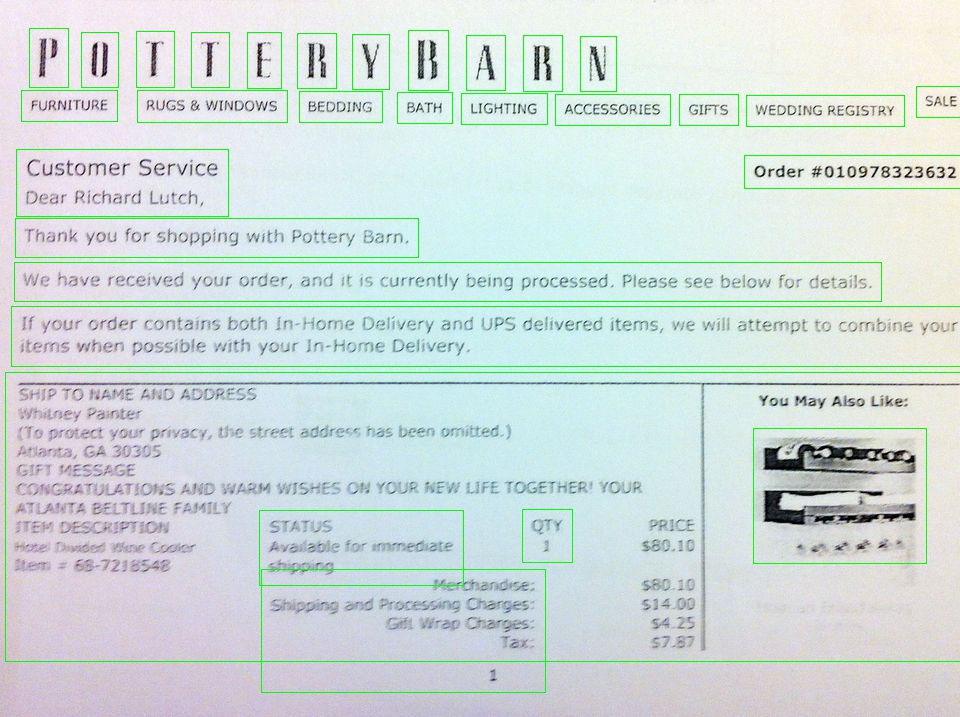

In [14]:
file = r'/home/naga/Documents/Naga/project/Reciept_classify/pictures/Reciept/inline-filename--diyfeedback-png-'

im1 = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
im = cv2.imread(file)

ret,thresh1 = cv2.threshold(im1,180,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
dilated = cv2.dilate(thresh1,kernel,iterations = 1)
_,contours, hierarchy = cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#for hie,cnt in zip(hierarchy[0],contours):
cv2.drawContours(im,contours,-1,(0,0,255),1)
#     x,y,w,h = cv2.boundingRect(cnt)
#     if w>10 and h>10 or hie[0]==-1:
#         #bound the images
#         cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),1)

#cv2.namedWindow('BindingBox', cv2.WINDOW_NORMAL)
cv2.imwrite('BindingBox4.jpg',im)

Image(filename='pictures/BindingBox2.jpg', width=700, height=400)

### Receipt Type - 3

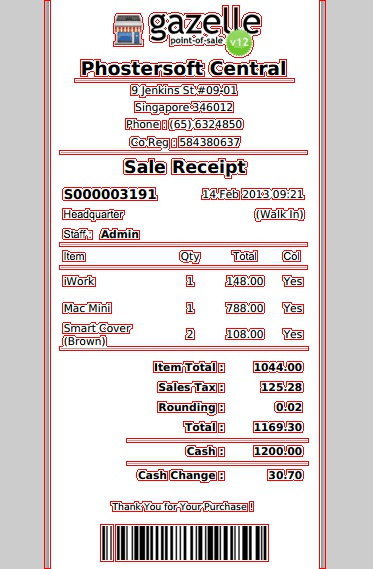

In [18]:

file = r'/home/naga/Documents/Naga/project/Reciept_classify/pictures/Reciept/081212-Beltline-ex-1440601a-3.JPG'

im1 = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
im = cv2.imread(file)

ret,thresh1 = cv2.threshold(im1,180,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
dilated = cv2.dilate(thresh1,kernel,iterations = 5)
_,contours, hierarchy = cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for hie,cnt in zip(hierarchy[0],contours):
    x,y,w,h = cv2.boundingRect(cnt)
    if w>10 and h>10 or hie[0]==-1:
        #bound the images
        cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),1)

#cv2.namedWindow('BindingBox', cv2.WINDOW_NORMAL)
cv2.imwrite('pictures/BindingBox4.jpg',im)

Image(filename='pictures/BindingBox3.jpg')

## Modelling

Using 3 Models in Extracting the Features of Receipt Pattern, Important Text words and combined Classification Model for receipt Classification

### ! )  Pattern Recognition Model 
Residual Neural Network of 10 layers to recongnise and differentiate the Receipts of 3 types and the other images. 
The Last before layer Output Prediction values are considered as Pattern Features of each Image.

    Input:  Receipt Images and Other Paper(included text) images 
    Output:  Last before layer Prediction of 124 length Embedding of specifying the Pattern of Receipt
    

### !! ) Text Classification Model
Extracting the Text of each Receipt with the use of Optical Character Recognition (tesseeract) and differentiating the Receipt text with some novels or different text to extract the key features of Receipt text information.
    
    Input:  Extracted Text of Receipts and Extracted Text of some different Non-Receipt images
    Output:  Last before layer Prediction of 124 length Embedding of specifying the Important Words information

### !!! ) Convolution Network to Classify the Image
Neural Network of 4 layers with the concatenated input of Pattern Information Embedding and the Important Key words Text information as Inputs
    
    Input:  Concatenated Features infomation of Model 1 Pattern output and Model 2 Text information output
    Output:  Classified Output of Receipt or Not


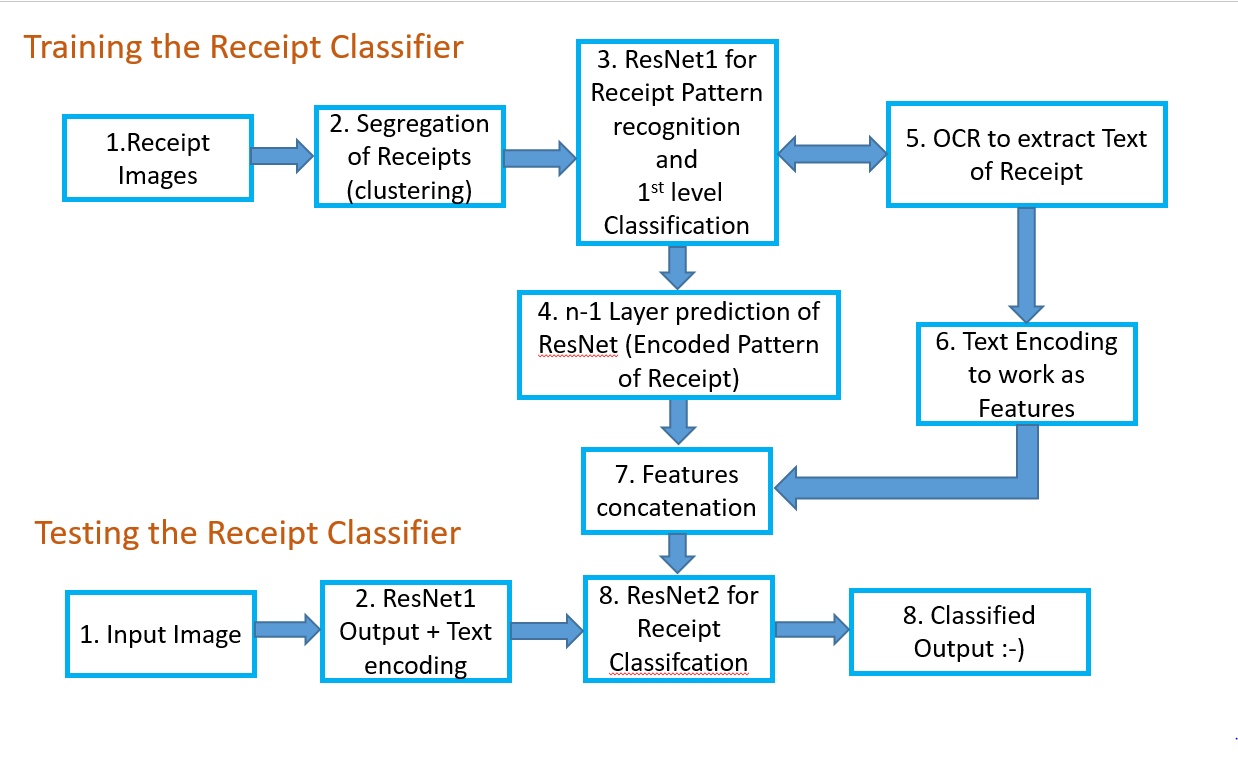

In [33]:
# Algorithm in Classifying the Receipt
display.Image(filename='Model.png')

## Step --  3


### ! )  Pattern Recognition Model 

    Input:  Receipt Images and Other Paper(included text) images 
    Output:  Last before layer Prediction of 124 length Embedding of specifying the Pattern of Receipt

### Preprocessing ImageData
#### Reading the Images data from folders and Preprocessing to keep same pixel Size
 
 To read the images with this keep all segregated images in specific folder and give path to the Module,
 
 The Segregated files can be converted to arrays of specified length and ready to feed to Neural Network model

In [2]:
loaded_images = []
def Preprocess_Images(person,data_location):
    images = os.listdir(os.path.join(data_location,person))
    
    Preprocess_data = {}
    for i in images:
        Img = Image.open(os.path.join(data_location,person,i))
        Img = Img.resize((60,60),Image.ANTIALIAS)
        if len(np.array(Img).shape) == 3 and np.array(Img).shape[2]==3:
            Preprocess_data[i] = np.array(Img)
            #train_person.append(np.array(Img))
    
    global loaded_images
    loaded_images.append(Preprocess_data)
        
    train_person = np.concatenate([arr[np.newaxis] for arr in list(Preprocess_data.values())])

    print('shape of ',person,' data',train_person.shape)
    return train_person

def Pattern_Preprocessing(folder_location):
    data_location = folder_location
    data_X = np.concatenate([Preprocess_Images(person,data_location) for person in os.listdir(data_location)])
    data_Y = keras.utils.np_utils.to_categorical(np.repeat(np.arange(len(loaded_images)),[len(list(i.values())) for i in loaded_images])[:,None])
    return data_X,data_Y

P_data_X, P_data_Y = Pattern_Preprocessing(r'pictures\Pictures')

shape of  others  data (451, 60, 60, 3)
shape of  Receipt_Type1  data (322, 60, 60, 3)
shape of  Receipt_Type2  data (18, 60, 60, 3)
shape of  Receipt_Type3  data (210, 60, 60, 3)


### Picking the Train and test values Randomly

In [3]:
# Picking the Values Randomly from different clusters to train on data
np.random.seed(531)
Random_numbers = np.random.choice(range(len(P_data_X)),len(P_data_X), replace=False)
train_seq = Random_numbers[:int(0.8*len(P_data_X))]
test_seq = Random_numbers[int(0.8*len(P_data_X)):]
P_Train_X = P_data_X[train_seq]
P_Test_X = P_data_X[test_seq]
P_Train_Y = P_data_Y[train_seq]
P_Test_Y = P_data_Y[test_seq]

### Residual Network of Convolution implementation to recognize the Pattern of Receipt

In [4]:
def Convolution_block(X,Filters):
    X_input=X
    f1,f2,f3,f4=Filters
    X = Conv2D(filters=f1, kernel_size=1, padding='same', activation='relu')(X_input)
    X = Dropout(0.5)(X)
    
    X = Conv2D(filters=f2, kernel_size=8, padding='same', activation='sigmoid')(X)
    X = Dropout(0.5)(X)
    
    X = Conv2D(filters=f3, kernel_size=1, padding='same', activation='sigmoid')(X)
    X = Dropout(0.5)(X)
    
    X_shortcut=Dense(f4,activation='sigmoid')(X_input)
    
    X=keras.layers.Add()([X,X_shortcut])
    X=Activation('relu')(X)
    return X

def Identity_block(X,Filters):
    X_input=X
    f1,f2,f3=Filters
    X = Conv2D(filters=f1, kernel_size=1, padding='same', activation='relu')(X_input)
    X = Dropout(0.5)(X)
    
    X = Conv2D(filters=f2, kernel_size=8, padding='same', activation='sigmoid')(X)
    X = Dropout(0.5)(X)
    
    X = Dense(f3,activation='softmax')(X)
    X = Dropout(0.5)(X)
    
    X = keras.layers.Add()([X,X_input])
    X = Activation('relu')(X)
    return X

def Pattern_Recognion_Model(X_train,y_train):
    X_input = Input(X_train.shape)
    
    X = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(X_input)

    X = Dense(512,activation='sigmoid')(X)
    
    X = Convolution_block(X,[512,512,248,248])
    X = MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)(X)
    X = Identity_block(X,[248,248,248])
    X = MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)(X)
    
    X = Convolution_block(X,[248,248,124,124])
    X = MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)(X)
    X = Identity_block(X,[124,124,124])

    X=Dense(64,activation='softmax')(X) 
    X=keras.layers.Flatten()(X)
    
    Feature_model = Model(inputs=X_input,outputs=X,name='Pattern_features')
    Feature_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics = [auc_pr]) 
    
    X=Dense(y_train.shape[1],activation='softmax')(X)
    model=Model(inputs=X_input,outputs=X,name='Convolve')
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics = [auc_pr])
    return model,Feature_model

### Keras Datagen to Augment Image data and training the Convolution NN Model

In [48]:
model,Pattern_Model = Pattern_Recognion_Model(Train_X[1],Train_Y)
datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

model.fit_generator(datagen.flow(P_Train_X,P_Train_Y , batch_size=32),validation_data=(P_Test_X,P_Test_Y),
                    steps_per_epoch=len(P_Train_X) / 32, epochs=5)

Epoch 1/5
26/25 [===============================] - 878s 34s/step - loss: 3.8723 - auc_pr: 0.4415 - val_loss: 5.0244 - val_auc_pr: 0.5084
Epoch 2/5
26/25 [===============================] - 883s 34s/step - loss: 4.0905 - auc_pr: 0.5073 - val_loss: 5.0244 - val_auc_pr: 0.5143
Epoch 3/5
26/25 [===============================] - 920s 35s/step - loss: 4.0905 - auc_pr: 0.5161 - val_loss: 5.0244 - val_auc_pr: 0.5161
Epoch 4/5
26/25 [===============================] - 917s 35s/step - loss: 4.3781 - auc_pr: 0.5166 - val_loss: 5.0244 - val_auc_pr: 0.5170
Epoch 5/5
26/25 [===============================] - 924s 36s/step - loss: 4.0905 - auc_pr: 0.5183 - val_loss: 5.0244 - val_auc_pr: 0.5173


In [6]:
# serialize model to JSON
model_json = Pattern_Model.to_json()
with open("Models\Pattern_recognition\Pattern_recognizer.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
Pattern_Model.save_weights("Models\Pattern_recognition\Pattern_recognizer.h5")
print("Saved model to disk")
 

Saved model to disk


In [30]:
# load json and create model
json_file = open('Models\Pattern_recognition\Pattern_recognizer.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
Pattern_Model = model_from_json(loaded_model_json)
# load weights into new model
Pattern_Model.load_weights("Models\Pattern_recognition\Pattern_recognizer.h5")
print("Loaded model from disk")

Loaded model from disk


## Step -- 5
### Optical Character Recognition with Tesseract to extract the Text of Image

### Preprocessing Image Text data
#### Reading the Images data from folders and extracting Text of Image with Optical Character Recognition system
 
 To read the images with this keep all segregated images in specific folder and give path to the Module,
 
 The Segregated files can be converted to arrays of specified length and ready to feed to Neural Network model

In [16]:

y = []
def Preprocess_Images(person,data_location):
    images = os.listdir(os.path.join(data_location,person))
    train_person = {}
    for i in images:
        if i in list(loaded_images[os.listdir(data_location).index(person)].keys()):
            Img = Image.open(os.path.join(data_location,person,i))
            try:
                text = pytesseract.image_to_string(Img)
                train_person[i] = list(map(ord,text))
                
            except:
                train_person[i] = [0]
                
    print('shape of ',person,' data',len(train_person))
    return train_person

    
def Text_Extraction(folder_location):
    data_location = folder_location
    data_X = [Preprocess_Images(person,data_location) for person in os.listdir(data_location)]
    data_X = sum([list(i.values()) for i in data_X ],[])
    data_X = keras.preprocessing.sequence.pad_sequences(data_X,2000)
    
    data_Y = keras.utils.np_utils.to_categorical(np.repeat(np.arange(len(loaded_images)),[len(list(i.values())) for i in loaded_images])[:,None])
    return data_X,data_Y

data_X, data_Y = Text_Extraction(r'pictures\Pictures')

shape of  others  data 451
shape of  Receipt_Type1  data 322
shape of  Receipt_Type2  data 18
shape of  Receipt_Type3  data 210


In [7]:
import pickle
with open(r'file.dat','rb') as f:
    data_X = pickle.load(f)

In [9]:
# Picking the Values Randomly from different clusters to train on data
np.random.seed(531)
Random_numbers = np.random.choice(range(len(data_X)),len(data_X), replace=False)
train_seq = Random_numbers[:int(0.8*len(data_X))]
test_seq = Random_numbers[int(0.8*len(data_X)):]
Train_X = data_X[train_seq]
Test_X = data_X[test_seq]
Train_Y = data_Y[train_seq]
Test_Y = data_Y[test_seq]

Train_X = Train_X.reshape(Train_X.shape[0],1,Train_X.shape[1])
Test_X = Test_X.reshape(Test_X.shape[0],1,Test_X.shape[1])

## Step -- 6


### !!) Text Classification Model and Text encoding with Neural Network Output layer to work as Features

    Input:  Extracted Text of Receipt Images and text of Other Paper(included text) images 
    Output:  Last before layer Prediction of 124 length Embedding of specifying the Important words for Receipt


In [10]:
def Text_features(train_X,train_Y):
    inp = Input(train_X.shape)
    X = LSTM(480, activation = 'relu', return_sequences=True)(inp)
    X = LSTM(240, activation = 'relu')(X)
    Feature_model = Model(inp,X)
    Feature_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    
    X = Dense(train_Y.shape[1],activation='softmax')(X)
    model = Model(inp,X)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model,Feature_model


In [11]:
model,Text_model = Text_features(Train_X[0],Train_Y)
model.fit(Train_X,Train_Y,validation_data=(Test_X,Test_Y),epochs=10)

Train on 800 samples, validate on 201 samples
Epoch 1/10
800/800 [==============================] - 7s 8ms/step - loss: 3.1767 - acc: 0.6909 - val_loss: 2.8016 - val_acc: 0.7376
Epoch 2/10
800/800 [==============================] - 4s 5ms/step - loss: 2.8907 - acc: 0.7319 - val_loss: 2.3745 - val_acc: 0.7612
Epoch 3/10
800/800 [==============================] - 4s 5ms/step - loss: 1.9371 - acc: 0.7941 - val_loss: 2.3537 - val_acc: 0.7475
Epoch 4/10
800/800 [==============================] - 4s 5ms/step - loss: 1.9298 - acc: 0.7909 - val_loss: 2.4936 - val_acc: 0.7463
Epoch 5/10
800/800 [==============================] - 4s 5ms/step - loss: 1.9593 - acc: 0.7956 - val_loss: 1.9352 - val_acc: 0.7873
Epoch 6/10
800/800 [==============================] - 4s 5ms/step - loss: 1.9841 - acc: 0.8009 - val_loss: 2.2683 - val_acc: 0.7687
Epoch 7/10
800/800 [==============================] - 4s 5ms/step - loss: 1.6878 - acc: 0.8144 - val_loss: 2.3561 - val_acc: 0.7612
Epoch 8/10
800/800 [==========

In [12]:
# serialize model to JSON
model_json = Text_model.to_json()
with open("Models\Text_Extraction\Text_Model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
Text_model.save_weights("Models\Text_Extraction\Text_Model.h5")
print("Saved model to disk")

Saved model to disk


In [104]:
# load json and create model
json_file = open('Models\Text_Extraction\Text_Model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
Text_model = model_from_json(loaded_model_json)
# load weights into new model
Text_model.load_weights("Models\Text_Extraction\Text_Model.h5")
print("Loaded model from disk")

Loaded model from disk


## Step -- 7 
### Feature Concatenation 

Concatenating the Features of Pattern Recognition Model and the Text Features model

In [113]:
Pattern_Features = Pattern_Model.predict(P_Train_X)
Pattern_Features.shape

(800, 3136)

In [112]:
Text_Features = Text_model.predict(Train_X)
Text_Features.shape

(800, 240)

In [114]:
Features = np.concatenate((Pattern_Features,Text_Features), axis=1)
Features = Features.reshape(Features.shape[0],1,Features.shape[1])
Features.shape

(800, 1, 3376)

## Step -- 8
### Receipt Classification Model

### !!! ) Convolution Network to Classify the Image
Residual Neural Network of 16 layers with the concatenated input of Pattern Information Embedding and the Important Key words Text information 
    
    Input:  Concatenated Features infomation of Model 1 Pattern and Model 2 Text information 
    Output:  Classified Output of Receipt or Not
    
    
### Concatenating the Pattern Features and Text Features as one Array


In [115]:
def Receipt_Classification_Model(X_train,y_train):
    X_input=Input(X_train.shape)
    X = Dense(512,activation = 'sigmoid')(X_input)
    X = Conv1D(filters=248, kernel_size=3, padding='same', activation='relu')(X)
    X = Dropout(0.5)(X)
    X = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(X)
    X = Dropout(0.5)(X)
    X = LSTM(128,activation='sigmoid')(X)
    
    X = Dense(y_train.shape[1],activation='softmax')(X)
    model = Model(inputs = X_input, output =X, name='Convolve')
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics = [auc_pr])
    return model

In [116]:
Classifier = Receipt_Classification_Model(Features[0],Train_Y)

In [119]:
Classifier.fit(Features,Train_Y,validation_split=0.1,epochs=10)

Train on 720 samples, validate on 80 samples
Epoch 1/10
720/720 [==============================] - 1s 1ms/step - loss: 0.2094 - auc_pr: 0.8376 - val_loss: 0.4879 - val_auc_pr: 0.8381
Epoch 2/10
720/720 [==============================] - 1s 1ms/step - loss: 0.2142 - auc_pr: 0.8387 - val_loss: 0.4882 - val_auc_pr: 0.8391
Epoch 3/10
720/720 [==============================] - 1s 1ms/step - loss: 0.2190 - auc_pr: 0.8394 - val_loss: 0.4629 - val_auc_pr: 0.8399
Epoch 4/10
720/720 [==============================] - 1s 1ms/step - loss: 0.2058 - auc_pr: 0.8402 - val_loss: 0.4600 - val_auc_pr: 0.8410
Epoch 5/10
720/720 [==============================] - 1s 1ms/step - loss: 0.2083 - auc_pr: 0.8414 - val_loss: 0.4838 - val_auc_pr: 0.8419
Epoch 6/10
720/720 [==============================] - 1s 1ms/step - loss: 0.2040 - auc_pr: 0.8422 - val_loss: 0.4701 - val_auc_pr: 0.8430
Epoch 7/10
720/720 [==============================] - 1s 1ms/step - loss: 0.2015 - auc_pr: 0.8433 - val_loss: 0.4617 - val_auc_

In [120]:
# serialize model to JSON
model_json = Classifier.to_json()
with open("Models\Classification\Classification_Model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
Classifier.save_weights("Models\Classification\Classification_Model.h5")
print("Saved model to disk")


Saved model to disk


In [103]:
# load json and create model
json_file = open('Models\Classification\Classification_Model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
Classifier = model_from_json(loaded_model_json)
# load weights into new model
Classifier.load_weights("Models\Classification\Classification_Model.h5")
print("Loaded model from disk")

Loaded model from disk


### Evaluating the Model performance

In [35]:
Test_Pattern_Features = Pattern_Model.predict(P_Test_X)
Test_Pattern_Features.shape

(201, 3136)

In [33]:
Test_Text_Features = Text_model.predict(Test_X)
Test_Text_Features.shape

(201, 240)

In [63]:
Features = np.concatenate((Test_Pattern_Features,Test_Text_Features), axis=1)
Features = Features.reshape(Features.shape[0],1,Features.shape[1])
Features.shape

(201, 1, 3376)

In [64]:
results = Classifier.evaluate(Features,Test_Y)
print('\n\nReceipt Classification Accuracy   ',results[1]*100)

201/201 [==============================] - 0s 160us/step


Receipt Classification Accuracy    85.23750690678459


## Step -- 9

### Testing on Single Image

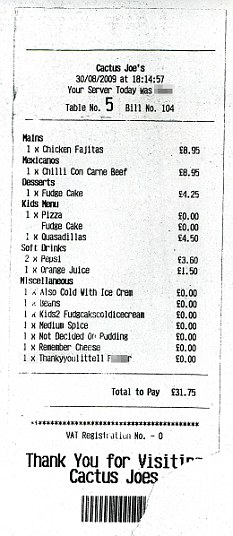

In [98]:
img_path = r'Pictures\Receipt_Type1\OTH63article-1212583-06601FEE000005DC-940-233x536.jpg'
image = Image.open(img_path)
Img = np.array(image.resize((60,60),Image.ANTIALIAS))
Img_pattern = Pattern_Model.predict(Img[None,:])
image

In [86]:
text = pytesseract.image_to_string(image)
text = keras.preprocessing.sequence.pad_sequences([list(map(ord,text))],maxlen=2000)
text_info = Text_model.predict(text[None,:])

In [92]:
Features.shape

(201, 1, 3376)

In [121]:
Category_predicted = np.argmax(np.round(Classifier.predict(np.concatenate((Img_pattern,text_info),axis=1)[:,None])))

In [122]:
print('Classified Output is -------- ' ,os.listdir(r'Pictures')[Category_predicted])

Classified Output is --------  Receipt_Type1


### Model Refinements to Improve the Accuracy :

    1) Clustering the Images clearly based OpenCV Contours of different types of Receipts,
    2) Increasing the image data size(now i have used only 400 receipt Images)
    3) Finetuning the model Parameters to give better Accuracy
    